In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from lib import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np

In [2]:
rec = Recommender(lam=0.01, gamma=0.01, tau=0.01)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv")
print(len(rec.users))
print(len(rec.movies))

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|██████████| 59047/59047 [00:22<00:00, 2619.81it/s] 

162541
59047


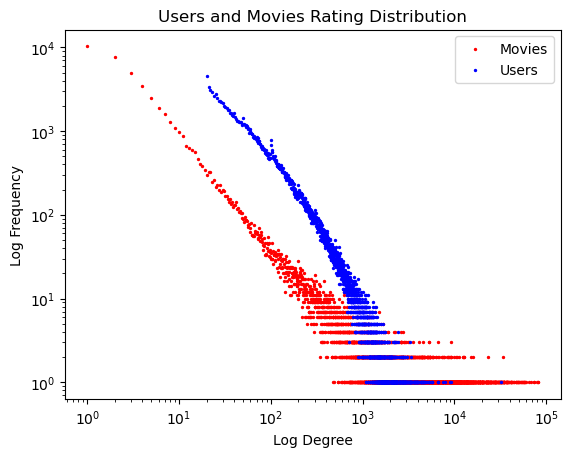

In [3]:
user_freq = {}
movie_freq = {}

#iterate over users
for user in rec.users:
    degree = len(user.ratings)
    if degree not in user_freq:
        user_freq[degree] = 1
    else:
        user_freq[degree] += 1

for movie in rec.movies:
    degree = len(movie.ratings)

    if degree not in movie_freq:
        movie_freq[degree] = 1
    else:
        movie_freq[degree] += 1

m_deg = [degree for degree in movie_freq.keys()]
m_freq = [freq for freq in movie_freq.values()]
plt.scatter(m_deg, m_freq, c='red', s=2, label='Movies')

u_deg = [degree for degree in user_freq.keys()]
u_freq = [freq for freq in user_freq.values()]
plt.scatter(u_deg, u_freq, c='blue', s=2, label='Users')
plt.xscale("log")
plt.yscale("log")


plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.legend()
plt.title("Users and Movies Rating Distribution")

plt.show()

In [4]:
statistics = rec.fit_vectorized(max_iter=10)

Initialized variables and calculated statistics: 54.83090353012085s
Ran initial update to user and item biases: 4.72815728187561s
Updated statistics: 54.12569189071655


  0%|          | 0/10 [00:00<?, ?it/s]

Updated user embeddings and biases: 16.254305362701416
Updated item embeddings and biases: 12.540555000305176


 10%|█         | 1/10 [01:23<12:31, 83.52s/it]

Updated statistics: 54.72383141517639
Updated user embeddings and biases: 16.19520616531372
Updated item embeddings and biases: 12.599172592163086


 20%|██        | 2/10 [02:47<11:11, 83.97s/it]

Updated statistics: 55.48782181739807
Updated user embeddings and biases: 16.392965078353882
Updated item embeddings and biases: 12.47620439529419


 30%|███       | 3/10 [04:12<09:49, 84.20s/it]

Updated statistics: 55.60370397567749
Updated user embeddings and biases: 15.195531845092773
Updated item embeddings and biases: 11.279044389724731


 40%|████      | 4/10 [05:32<08:16, 82.76s/it]

Updated statistics: 54.06771898269653
Updated user embeddings and biases: 16.51881194114685
Updated item embeddings and biases: 12.675231218338013


 50%|█████     | 5/10 [06:56<06:56, 83.27s/it]

Updated statistics: 54.97464084625244
Updated user embeddings and biases: 16.366976737976074
Updated item embeddings and biases: 12.441638469696045


 60%|██████    | 6/10 [08:27<05:43, 85.79s/it]

Updated statistics: 61.892072439193726
Updated user embeddings and biases: 16.52911400794983
Updated item embeddings and biases: 12.950227975845337


 70%|███████   | 7/10 [09:54<04:18, 86.05s/it]

Updated statistics: 57.11178517341614
Updated user embeddings and biases: 16.844255208969116
Updated item embeddings and biases: 13.571092367172241


 80%|████████  | 8/10 [11:20<02:52, 86.25s/it]

Updated statistics: 56.25901818275452
Updated user embeddings and biases: 16.099298000335693
Updated item embeddings and biases: 12.73123836517334


 90%|█████████ | 9/10 [12:46<01:26, 86.00s/it]

Updated statistics: 56.62124490737915
Updated user embeddings and biases: 16.80461096763611
Updated item embeddings and biases: 12.952259540557861


100%|██████████| 10/10 [14:14<00:00, 85.50s/it]

Updated statistics: 58.79088544845581


[1709060.9189463668, 111947.29166060593, 88550.69706296867, 78969.22593916903, 72915.3469558282, 69861.08449367667, 68121.34795098157, 66997.30143281532, 66205.9508362458, 65610.85702696294, 65139.64159000398, 64751.1772946378]


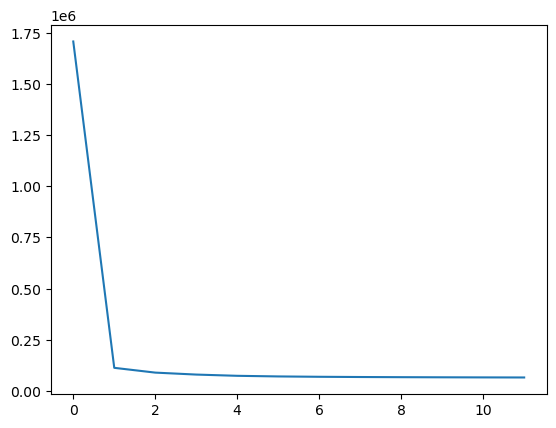

In [5]:
plt.plot(statistics['neg_log_liks'])
print(statistics['neg_log_liks'])

[3.696426900185126, 0.8943436052221515, 0.7788433375724155, 0.7295796041975204, 0.6980109186323166, 0.6823164502734319, 0.6737885108790878, 0.6686420944987276, 0.6653073600088031, 0.6630231468481532, 0.6613877825686645, 0.6601749596663171]


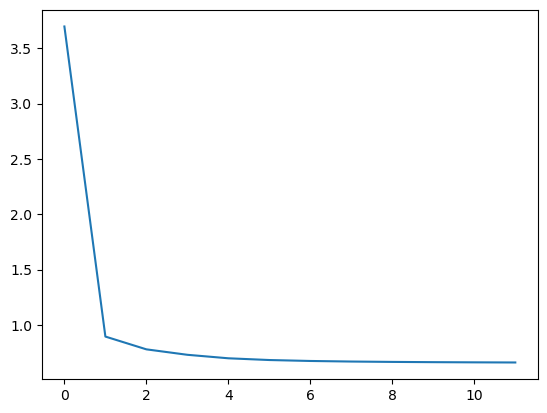

In [6]:
plt.plot(statistics['RMSEs'])
print(statistics['RMSEs'])

[1.0002581152208154, 1.0002581152208154, 2.353820049749096, 2.349981789105825, 2.336052392730228, 2.3279710048970075, 2.31501373384196, 2.300830911042651, 2.287188312322497, 2.2746103004033764, 2.263096166702058, 2.2525594472561665]


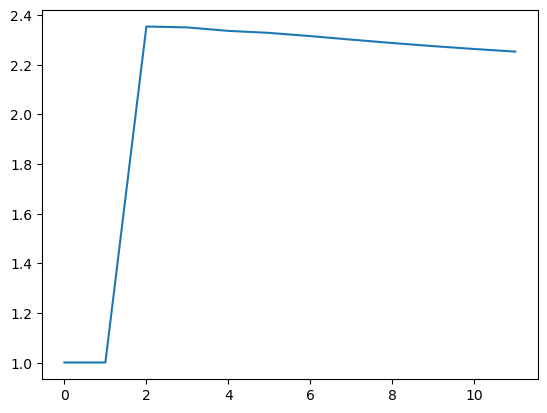

In [7]:
plt.plot(statistics['user_embed_length'])
print(statistics['user_embed_length'])

[0.9993240187981606, 0.9993240187981606, 1.1882046737337197, 1.489617307848181, 1.580128229191945, 1.634904015516358, 1.6819095732400533, 1.7256827972213797, 1.767296091714724, 1.8069054894252168, 1.8445529614372007, 1.8801912775338618]


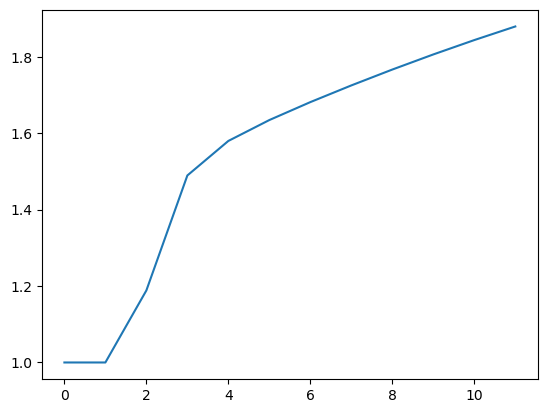

In [8]:
plt.plot(statistics['item_embed_length'])
print(statistics['item_embed_length'])

[0.0, 3.6138911859350697, 3.547675382658935, 3.4826351344951667, 3.40545112661026, 3.3408071173571874, 3.285507052229262, 3.235781532799536, 3.1899861704705517, 3.14714508884493, 3.106595083536622, 3.067874097503771]


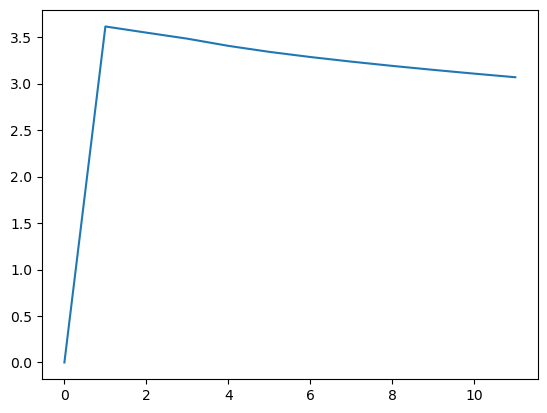

In [9]:
plt.plot(statistics['mean_user_bias'])
print(statistics['mean_user_bias'])

[0.0, -0.16645289371302582, -0.19332324032084738, -0.18121783933333568, -0.16047516882087104, -0.1429501826575338, -0.12828089709997792, -0.11521543896370877, -0.10304497986532567, -0.09144016191111222, -0.08022879298623528, -0.06930573128820507]


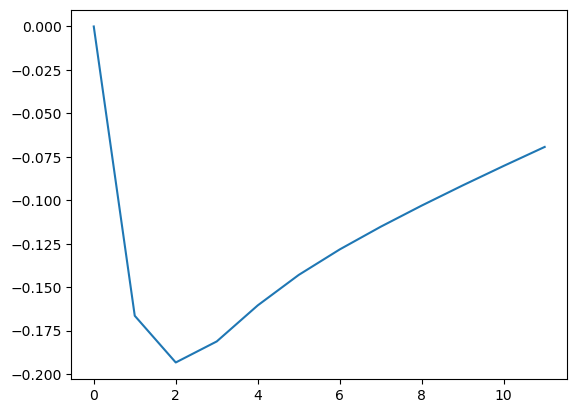

In [10]:
plt.plot(statistics['mean_item_bias'])
print(statistics['mean_item_bias'])